# Linear Regression

### 1. Gather Data

In [7]:
import pandas as pd
import scipy.sparse

# Path to your CSV file
csv_file = '../../data/data_processed.csv'
csv_file_bow = '../../data/bow_features.csv'
# Read CSV into a DataFrame
df = pd.read_csv(csv_file)
df
X_bow = scipy.sparse.load_npz("../../data/bow_features.npz")


### 2. Convert labels to numeric scores

In [21]:
# Convert label to sentiment score
def label_to_score(label):
    if label == 'positive':
        return 2
    elif label == 'neutral':
        return 1
    elif label == 'negative':
        return 0
    else:
        return 1  

df['sentiment_score'] = df['sentiment'].apply(label_to_score)
df


,Unnamed: 0,review,sentiment,clean_text,no_stopwords,tokenized,lemmatized,sentiment_score
0,0,"""Paula, I may be a bitch, but I'll never be a ...",negative,paula i may be a bitch but ill never be a butc...,paula may bitch ill never butch br br hilariou...,"['paula', 'may', 'bitch', 'ill', 'never', 'but...",paula may bitch ill never butch br br hilariou...,0
1,1,Many people here say that this show is for kid...,negative,many people here say that this show is for kid...,many people say show kids hm kid approximately...,"['many', 'people', 'say', 'show', 'kids', 'hm'...",many people say show kid hm kid approximately ...,0
2,2,This was a well written tale of the Making of ...,positive,this was a well written tale of the making of ...,well written tale making batman sitcom actuall...,"['well', 'written', 'tale', 'making', 'batman'...",well write tale make batman sitcom actually re...,2
3,3,I think this movie is absolutely beautiful. An...,positive,i think this movie is absolutely beautiful and...,think movie absolutely beautiful im not referr...,"['think', 'movie', 'absolutely', 'beautiful', ...",think movie absolutely beautiful im not refer ...,2
4,4,The film was very outstanding despite the NC-1...,positive,the film was very outstanding despite the nc17...,film outstanding despite nc17 rating disturbin...,"['film', 'outstanding', 'despite', 'nc17', 'ra...",film outstanding despite nc17 rating disturb s...,2
...,...,...,...,...,...,...,...,...
59995,59995,Nothing special.,neutral,nothing special,nothing special,"['nothing', 'special']",nothing special,1
59996,59996,Avoid this one! It is a terrible movie. So wha...,negative,avoid this one it is a terrible movie so what ...,avoid one terrible movie exciting pointless mu...,"['avoid', 'one', 'terrible', 'movie', 'excitin...",avoid one terrible movie excite pointless murd...,0
59997,59997,This production was quite a surprise for me. I...,positive,this production was quite a surprise for me i ...,production quite surprise absolutely love obsc...,"['production', 'quite', 'surprise', 'absolutel...",production quite surprise absolutely love obsc...,2
59998,59998,This is a decent movie. Although little bit sh...,positive,this is a decent movie although little bit sho...,decent movie although little bit short time pa...,"['decent', 'movie', 'although', 'little', 'bit...",decent movie although little bit short time pa...,2


### 3.Feature Extraction from Text

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['lemmatized'])  # or 'tokenized'
y = df['sentiment_score']

### 4.Apply Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.7185850572339773


### 5. Check how good is the model

In [24]:

from sklearn.metrics import r2_score, accuracy_score
import numpy as np

# If your predictions are stored in `predictions`
# and your test labels are in `y_test`
print("R2 Score:", r2_score(y_test, y_pred))

# If using sentiment as classes (-1, 0, 1)
rounded_preds = np.round(y_pred)
print("Accuracy:", accuracy_score(y_test, rounded_preds))


R2 Score: 0.13470562800829677
Accuracy: 0.5181666666666667


### 6. Plot actual vs. predicted

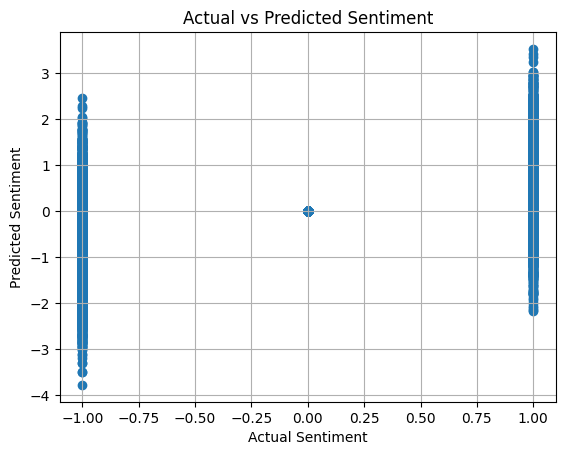

In [16]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sentiment")
plt.ylabel("Predicted Sentiment")
plt.title("Actual vs Predicted Sentiment")
plt.grid(True)
plt.show()
